# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dados dos consumidores

In [2]:
consumidores = pd.read_csv('olist_customers_dataset.csv')

In [3]:
consumidores.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
consumidores.shape

(99441, 5)

In [5]:
consumidores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
consumidores['customer_unique_id'].nunique() # Dados unicos sobre os consumidores

96096

In [48]:
consumidores['customer_zip_code_prefix'].value_counts() 
# Dados dos CEP de onde mais existem consumidores, interessante que o primeiro é dos Recreio dos Bandeirantes
# na cidade do RJ, e o segundo é de Ícarai na cidade de Niterói

customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
        ... 
35698      1
99370      1
64808      1
60876      1
99043      1
Name: count, Length: 14994, dtype: int64

In [7]:
consumidores.groupby('customer_city')['customer_unique_id'].count().sort_values(ascending=False)
# Contagem das cidades que mais existem consumidores

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [8]:
consumidores.groupby('customer_state')['customer_unique_id'].count().sort_values(ascending=False)
# Contagem dos Estados onde mais existem consumidores

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_unique_id, dtype: int64

In [9]:
consumidores[consumidores['customer_state'] == 'RJ'].groupby('customer_city')['customer_unique_id'].count().sort_values(ascending=False)
# Contagem das cidades do Estado do RJ onde mais existem consumidores

customer_city
rio de janeiro               6882
niteroi                       849
nova iguacu                   442
sao goncalo                   409
duque de caxias               266
                             ... 
purilandia                      1
sacra familia do tingua         1
santa isabel do rio preto       1
santa maria                     1
penedo                          1
Name: customer_unique_id, Length: 149, dtype: int64

# Dados de pagamentos

In [10]:
pagamentos = pd.read_csv('olist_order_payments_dataset.csv')

In [11]:
pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


<Axes: xlabel='payment_type'>

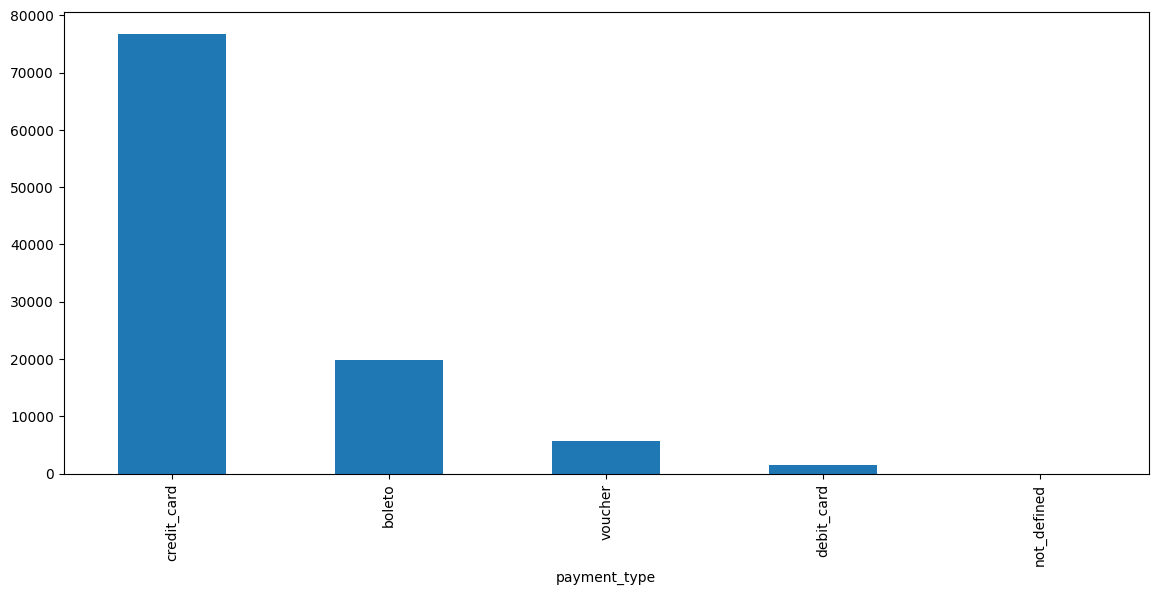

In [13]:
pagamentos['payment_type'].value_counts().plot(kind='bar',figsize=(14,6))
# Tipos de pagamentos mais utilizados

# Dados sobre os produtos e frete

In [14]:
produtos_vendas = pd.read_csv('olist_order_items_dataset.csv')
lista_produtos = pd.read_csv('olist_products_dataset.csv')

In [15]:
produtos_vendas.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
lista_produtos.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
produtos = produtos_vendas.merge(lista_produtos,on='product_id') 
# Juntando 2 datasets para uma melhor análise

In [18]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [19]:
produtos['product_category_name'].value_counts().head(10) 
# Contagem dos tipos de produtos mais vendidos

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64

<Axes: xlabel='product_category_name'>

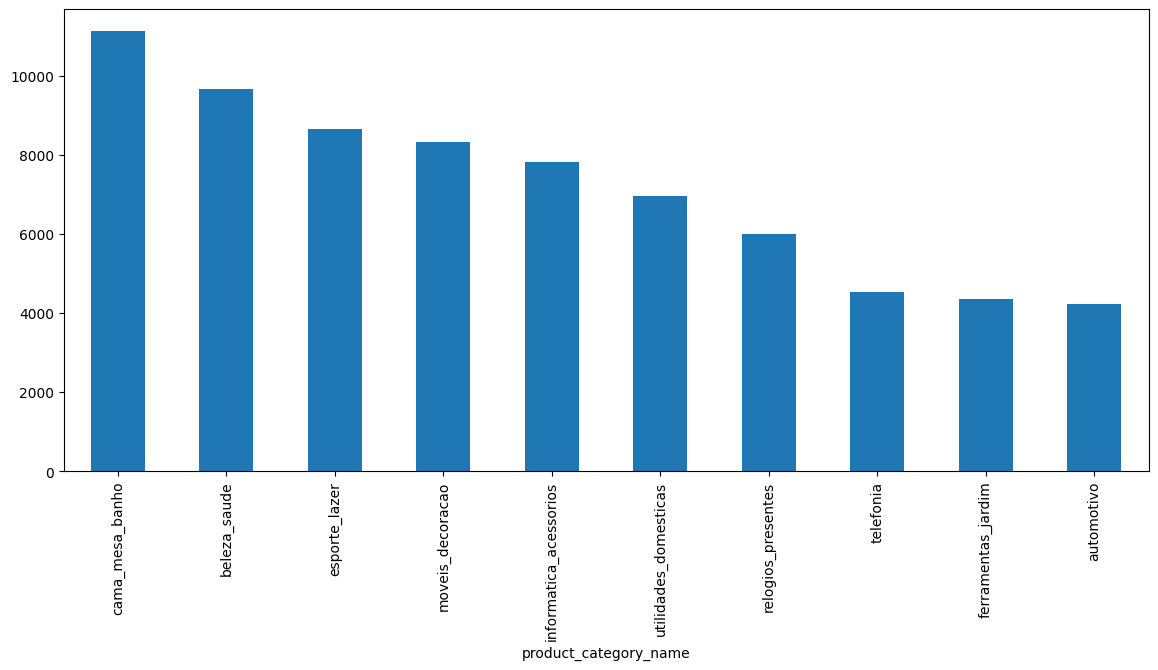

In [20]:
produtos['product_category_name'].value_counts().head(10).plot(kind='bar',figsize=(14,6))

In [21]:
correlacao1 = produtos[['product_weight_g','product_length_cm','product_height_cm','product_width_cm',
                       'price','freight_value']].corr()
# Tentando ver se existe alguma correlação do preço do frete com o peso do produto

<Axes: >

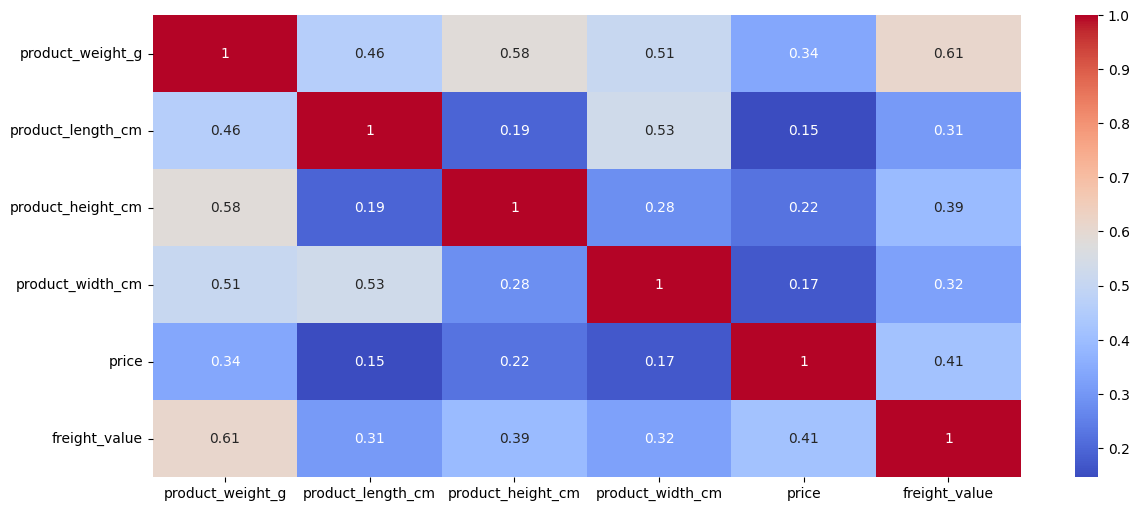

In [22]:
plt.figure(figsize=(14,6))
sns.heatmap(correlacao1, annot=True, cmap='coolwarm')

# O Mapa indica que existe uma correlação de 60% do preço do frete com o peso do produtos, e 40% com o preço
# do produto, muito provavelmente deve ter uma correlação mais alta com a distância da entrega

# Dados sobre os dias em que houveram mais vendas

In [23]:
ordem_compra = pd.read_csv('olist_orders_dataset.csv')

In [26]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         111047 non-null  float64
 9   product_description_lenght  111047 non-null  float64
 10  product_photos_qty          111047 non-null  float64
 11  product_weight_g            112632 non-null  float64
 12  product_length_cm           112632 non-null  float64
 13  product_height

In [25]:
ordem_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
vendas_dia = produtos.merge(ordem_compra,on='order_id') 
# Unindo 2 datasets para uma melhor análise

In [28]:
vendas_dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [34]:
vendas_dia['order_estimated_delivery_date'].value_counts().head(20)
# Podemos ver pela data de entrega dos produtos, uma maior compra no período que antecede o Natal
# pode se analisar que talvez nas datas do mês do março possa ser uma data próxima ao dia internacional
# das mulheres

order_estimated_delivery_date
2017-12-20 00:00:00    604
2018-05-29 00:00:00    598
2018-03-12 00:00:00    592
2018-03-13 00:00:00    584
2018-07-05 00:00:00    571
2018-05-28 00:00:00    563
2017-12-19 00:00:00    563
2017-12-18 00:00:00    562
2018-02-14 00:00:00    562
2018-05-30 00:00:00    559
2018-02-06 00:00:00    552
2018-03-06 00:00:00    550
2018-07-12 00:00:00    550
2018-03-19 00:00:00    550
2018-04-12 00:00:00    546
2018-07-18 00:00:00    544
2018-07-11 00:00:00    543
2017-12-15 00:00:00    543
2018-05-23 00:00:00    542
2018-07-16 00:00:00    542
Name: count, dtype: int64

# Dados sobre os vendedores

In [45]:
vendedores = pd.read_csv('olist_sellers_dataset.csv')

In [46]:
vendedores.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [47]:
vendedores['seller_zip_code_prefix'].value_counts() 
# CEPS de onde mais existem vendedores, o primeiro é de Ibitinga - SP, o segundo é de 
# Porto Ferreira - SP

seller_zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
         ..
83707     1
85065     1
78552     1
3632      1
12051     1
Name: count, Length: 2246, dtype: int64

In [50]:
vendedores['seller_city'].value_counts() # Contagem das cidades com mais vendedores

seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

<Axes: xlabel='seller_state'>

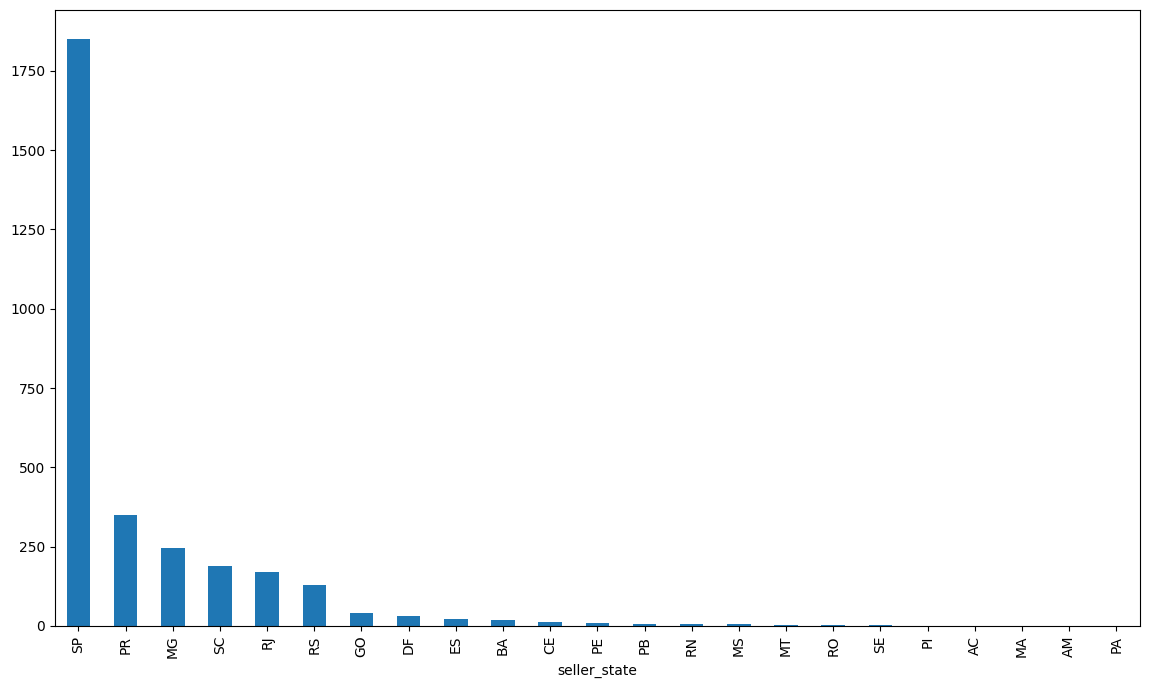

In [54]:
vendedores['seller_state'].value_counts().plot(kind='bar',figsize=(14,8))

In [58]:
vendedores[vendedores['seller_state'] == 'RJ']['seller_city'].value_counts().head(7)
# Cidades no Estado do RJ onde mais existem vendedores.

seller_city
rio de janeiro    93
niteroi            8
sao goncalo        7
petropolis         6
nova friburgo      5
nova iguacu        5
barra mansa        4
Name: count, dtype: int64